## 2:  The number of Ice Age trails that the Dane County geometry spatially contains

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [139]:
dane_county = gpd.read_file('County_Boundaries_24K.zip') # read file into geodataframe

A:\Softwares\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


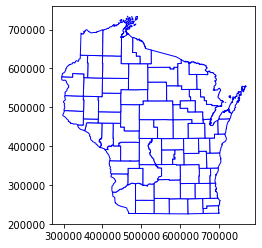

    OBJECTID            DNR_REGION  DNR_CNTY_C COUNTY_NAM COUNTY_FIP  \
0        321      Southeast Region          30    Kenosha         59   
1        322  South Central Region          33  Lafayette         65   
2        323  South Central Region          54       Rock        105   
3        324      Southeast Region          65   Walworth        127   
4        325  South Central Region          23      Green         45   
..       ...                   ...         ...        ...        ...   
67       388       Northern Region          64      Vilas        125   
68       389       Northern Region          26       Iron         51   
69       390       Northern Region          16    Douglas         31   
70       391       Northern Region           4   Bayfield          7   
71       392       Northern Region           2    Ashland          3   

       SHAPEAREA       SHAPELEN  \
0   7.210454e+08  123267.303863   
1   1.641795e+09  164707.650040   
2   1.879382e+09  174114.58767

In [120]:
ax = dane_county.plot(color='white', edgecolor='blue')
plt.show()
print(dane_county)

In [121]:
dane_county.loc[dane_county['COUNTY_NAM'] == 'Dane']

OBJECTID            DNR_REGION  DNR_CNTY_C COUNTY_NAM COUNTY_FIP  \
11       332  South Central Region          13       Dane         25   

       SHAPEAREA       SHAPELEN  \
11  3.204610e+09  231224.529663   

                                             geometry  
11  POLYGON ((571676.390 312252.640, 573183.440 31...

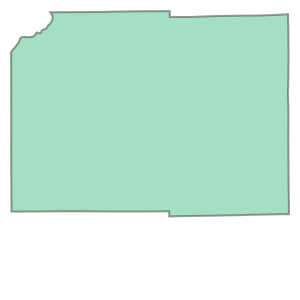

In [122]:
dane_county['geometry'][11]

In [123]:
trail = gpd.read_file('Ice_Age_Trail.zip')

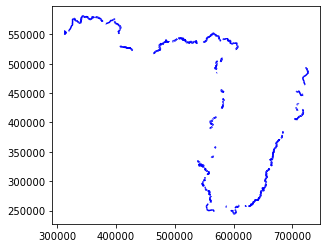

      OBJECTID    LENGTH_MET  NATIONAL_T  STATE_TRAI  TRAIL_COMP  TRAIL_CONN  \
0        63361    263.580739           3           0           0           9   
1        63362    413.918944           3           0           0           9   
2        63363  15527.973735           3           0           0           0   
3        63364  22575.419454           3           0           0           0   
4        63365    271.838740           3           0           0           0   
...        ...           ...         ...         ...         ...         ...   
2861     66222    637.723234           3           0           0           0   
2862     66223    125.893135           3           0           0           0   
2863     66224    310.830621           3           0           0           0   
2864     66225     44.157318           3           0           0           0   
2865     66226    160.235049           3           0           0           0   

      NPS_CERTIF  COINCIDENT  LOCATION_

In [124]:
ax = trail.plot( edgecolor='blue')
plt.show()
print(trail)

In [126]:
dane_gs = dane_county.geometry[11]   ## convert files to geoseries
trail_gs = trail.geometry
dane_trail_within = trail_gs[trail_gs.within(dane_gs)]

A:\Softwares\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


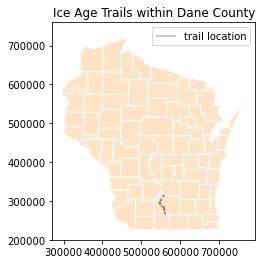

In [127]:
ax = dane_county.plot(color='#ffe3c6', edgecolor='white')
dane_trail_within.plot(ax=ax, marker = '+', color='grey', label = 'trail location', alpha = 0.5)

plt.title('Ice Age Trails within Dane County')
plt.legend()
plt.show()

A:\Softwares\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
A:\Softwares\anaconda3\lib\site-packages\geopandas\plotting.py:399: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


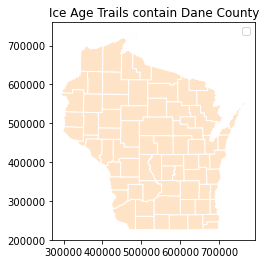

In [128]:
dane_trail_contain = trail_gs[trail_gs.contains(dane_gs)]
ax = dane_county.plot(color='#ffe3c6', edgecolor='white')
dane_trail_contain.plot(ax=ax, marker = '+', color='grey', label = 'trail location', alpha = 0.5)

plt.title('Ice Age Trails contain Dane County')
plt.legend()
plt.show()

In [135]:
trail_count = 0  # loop to find how many trails are within dane county

for eachLine in trail_gs:
    line_within = eachLine.within(dane_gs)
    condition = str(line_within)
    if line_within == 'True':
        trail_count +=1
trail_count

0

In [133]:
len(dane_trail_within)

277

## 1: To determine whether driversâ€™ behavior are considered as aggressive or not with regards to the following five criteria 

In [70]:
df = pd.read_csv('Q1.csv')
df

ID  Speed  DistanceToAhead  Acceleration  Deceleration  Steering
0   1     20              3.0          0.55          0.00     11.98
1   2     28             10.0          2.22          0.00     10.01
2   3     50             22.4          6.11          0.00     15.60
3   4     61             26.7          3.05          0.00     10.38
4   5     28             29.4          0.00         -9.60      5.12
5   6     51             32.0          6.38          0.00      9.11
6   7     60             33.0          2.50          0.00      8.91
7   8     90             50.0          8.33          0.00      6.17
8   9     65             15.0          0.00         -6.94     23.10
9  10     63             10.0          0.00         -0.55      8.66

In [136]:
def DriverSafetyScoring(df):   # define conditions to check the risk
    aggressive = 0
    aggressive += (df.Speed > 60)
    aggressive += (df.DistanceToAhead < 4)
    aggressive += (df.Acceleration > 3.5)
    aggressive += (df.Deceleration < -5.5)
    aggressive += (df.Steering > 15)
    return aggressive

In [137]:
df['risk_score'] = df.apply(lambda x: DriverSafetyScoring(x), axis=1) # apply lambda function, to calculate risk score to each condition

In [117]:
df

ID  Speed  DistanceToAhead  Acceleration  Deceleration  Steering  \
0   1     20              3.0          0.55          0.00     11.98   
1   2     28             10.0          2.22          0.00     10.01   
2   3     50             22.4          6.11          0.00     15.60   
3   4     61             26.7          3.05          0.00     10.38   
4   5     28             29.4          0.00         -9.60      5.12   
5   6     51             32.0          6.38          0.00      9.11   
6   7     60             33.0          2.50          0.00      8.91   
7   8     90             50.0          8.33          0.00      6.17   
8   9     65             15.0          0.00         -6.94     23.10   
9  10     63             10.0          0.00         -0.55      8.66   

   risk_score  
0           1  
1           0  
2           2  
3           1  
4           1  
5           1  
6           0  
7           2  
8           3  
9           1

## 3:  How many parcels have potential exposure to the health hazard due to the power line

In [3]:
from shapely.geometry import Point, MultiPoint, LineString, Polygon, shape

In [4]:
powerline = gpd.read_file('powerline\PowerLine.shp')  # read shape files into geodataframe
parcel = gpd.read_file('parcel\Parcels.shp')

In [5]:
print(f'powerline: {powerline}')
print(f'parcel:{parcel}')

powerline:    LineNo                                           geometry
0       1  LINESTRING (6407861.000 1830710.000, 6411445.0...
parcel:              AREA    PERIMETER  PARCEL_  PARCEL_ID     PARNUMA  \
0     38374.915398  1192.107539        2      23678  4290015917   
1     71339.693692  1477.788888        3          0  4290015918   
2      5085.437500   304.504638        4          0  4291031053   
3     16500.000000   520.001667        9          0  4283007036   
4     23596.388572   636.215170       10          0  4289011048   
...            ...          ...      ...        ...         ...   
3448   9576.093750   401.633647    23220      23433  4290022009   
3449   9576.093750   401.633647    23221      23434  4290022010   
3450   9576.093750   401.633647    23222      23435  4290022011   
3451   9576.093750   401.633647    23223      23436  4290022012   
3452   9576.093750   401.633647    23224      23437  4290022013   

          PREVPARNUM  EDITDATE                SITUSADDR

A:\Softwares\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

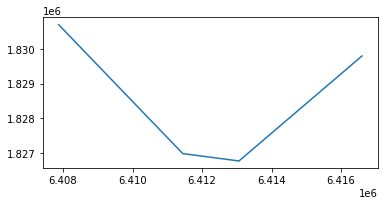

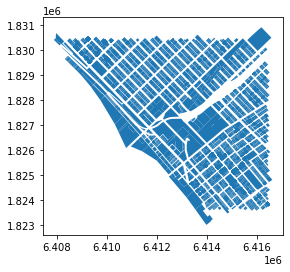

In [6]:
powerline.plot()
parcel.plot()

In [7]:
powerline_gs = powerline['geometry']  # convert files into geoseries
parcels_gs = parcel['geometry']

In [8]:
parcels_count = 0
for parcel in parcels_gs:
    parcels_count += 1

print('Total parcels: ',parcels_count)

Total parcels:  3453


In [9]:
powerline_buffer_250 = powerline_gs.buffer(250)  # create 250 ft buffer to powerline

AttributeError: 'Polygon' object has no attribute 'plot'

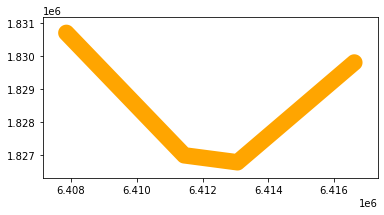

In [10]:
ax = powerline_buffer_250.plot(color = 'orange', label = 'power Line')
parcel.plot(ax=ax, color = '#2ACAEA')

plt.show()

In [11]:
parcel_intersect_count = 0  # loop the parcels to chek how many parcels inteset with powerline within 250 ft buffer powerline

for parcel in parcels_gs:
    intersect = powerline_buffer_250.contains(parcel, align = True)
    if str(intersect[0]) == 'True':
        parcel_intersect_count += 1

print(f'Parcels:{parcel_intersect_count}')

Parcels:68
